In [58]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler


In [71]:
df = pd.read_csv("income.csv")
df.head()


,Name,Age,Income($)
0,Rob,27,70000
1,Michael,29,90000
2,Mohan,29,61000
3,Ismail,28,60000
4,Kory,42,150000


In [60]:
from matplotlib import pyplot as plt


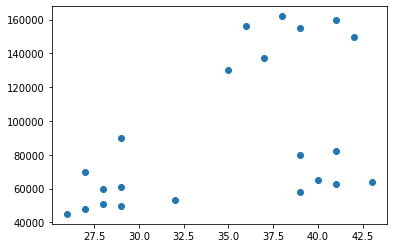

In [61]:
plt.scatter(df.Age, df["Income($)"])


In [62]:
km = KMeans(n_clusters=3)
clusters = km.fit_predict(df.drop("Name", axis=1))
clusters


array([2, 2, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0],
      dtype=int32)

In [63]:
df["cluster"] = clusters
df.head()


,Name,Age,Income($),cluster
0,Rob,27,70000,2
1,Michael,29,90000,2
2,Mohan,29,61000,0
3,Ismail,28,60000,0
4,Kory,42,150000,1


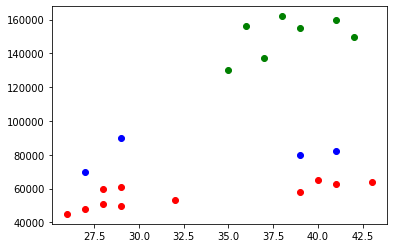

In [64]:
df0 = df[df["cluster"] == 0]
df1 = df[df["cluster"] == 1]
df2 = df[df["cluster"] == 2]
plt.scatter(df0.Age, df0["Income($)"], color="red")
plt.scatter(df1.Age, df1["Income($)"], color="green")
plt.scatter(df2.Age, df2["Income($)"], color="blue")


This is not ok because data is not scaled properly


In [72]:
scaler = MinMaxScaler()
scaler


MinMaxScaler()

In [73]:
scaler.fit(df[["Income($)"]])
df["Income($)"] = scaler.transform(df[["Income($)"]])
df.head()


,Name,Age,Income($)
0,Rob,27,0.213675
1,Michael,29,0.384615
2,Mohan,29,0.136752
3,Ismail,28,0.128205
4,Kory,42,0.897436


In [74]:
age_scaler = MinMaxScaler()
df["Age"] = age_scaler.fit_transform(df[["Age"]])
df.head()


,Name,Age,Income($)
0,Rob,0.058824,0.213675
1,Michael,0.176471,0.384615
2,Mohan,0.176471,0.136752
3,Ismail,0.117647,0.128205
4,Kory,0.941176,0.897436


In [75]:
km = KMeans(n_clusters=3)
clusters = km.fit_predict(df.drop("Name", axis=1))
clusters


array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2],
      dtype=int32)

In [76]:
df["cluster"] = clusters
df.head()


,Name,Age,Income($),cluster
0,Rob,0.058824,0.213675,0
1,Michael,0.176471,0.384615,0
2,Mohan,0.176471,0.136752,0
3,Ismail,0.117647,0.128205,0
4,Kory,0.941176,0.897436,1


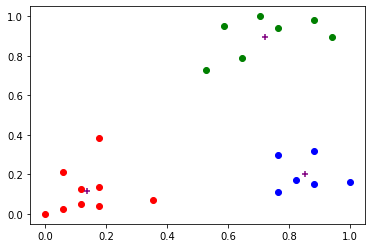

In [79]:
df0 = df[df["cluster"] == 0]
df1 = df[df["cluster"] == 1]
df2 = df[df["cluster"] == 2]
plt.scatter(df0.Age, df0["Income($)"], color="red")
plt.scatter(df1.Age, df1["Income($)"], color="green")
plt.scatter(df2.Age, df2["Income($)"], color="blue")
plt.scatter(
    km.cluster_centers_[:, 0], km.cluster_centers_[:, 1], color="purple", marker="+"
)
